In [3]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [32]:
dataset = pd.read_csv('diabetes.csv')
df = pd.DataFrame(dataset)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
#Divide the dataset into independent and dependent
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 36)

In [35]:
X.shape

(768, 8)

In [36]:
X_train.shape, X_test.shape

((514, 8), (254, 8))

In [37]:
#tarin models for ROC curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Logistic Regression
lr = LogisticRegression()

#KNN

knn = KNeighborsClassifier(n_neighbors=3)

#Decision Tree
dt = DecisionTreeClassifier()

#fit model
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

#predict probablities
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)
pred_prob3 = dt.predict_proba(X_test)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.metrics import roc_curve

#roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,-1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,-1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,-1], pos_label=1)

#roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [39]:
from sklearn.metrics import roc_auc_score

#auc scores
auc_scores1 = roc_auc_score(y_test, pred_prob1[:, -1])
auc_scores2 = roc_auc_score(y_test, pred_prob2[:, -1])
auc_scores3 = roc_auc_score(y_test, pred_prob3[:, -1])

print(auc_scores1, auc_scores2, auc_scores3)

0.8407604665273377 0.73022989280658 0.6794984156947347


C:\Users\Admin\AppData\Local\Temp\ipykernel_6624\3669516572.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


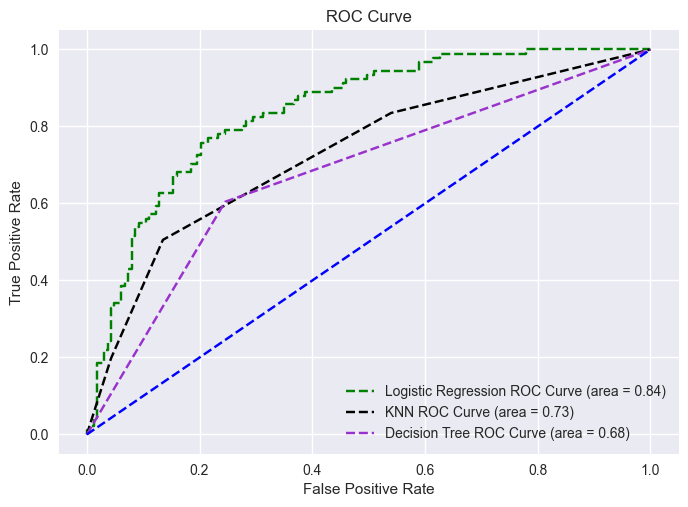

In [40]:
plt.style.use('seaborn')

#plot roc curves
plt.plot(fpr1, tpr1, linestyle='--', color='green', label='Logistic Regression ROC Curve (area = %0.2f)' %auc_scores1)
plt.plot(fpr2, tpr2, linestyle='--', color='black', label='KNN ROC Curve (area = %0.2f)' %auc_scores2)
plt.plot(fpr3, tpr3, linestyle='--', color='darkorchid', label='Decision Tree ROC Curve (area = %0.2f)' %auc_scores3)

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
#title
plt.title('ROC Curve')
#X label
plt.xlabel('False Positive Rate')
#Y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=400)
plt.show()